In [3]:

import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import sigpy.mri
import sigpy.plot

sitk_t1=sitk.ReadImage('../files/t1.nii.gz')
t1=sitk.GetArrayFromImage(sitk_t1)
print(t1.shape)

(90, 256, 256)


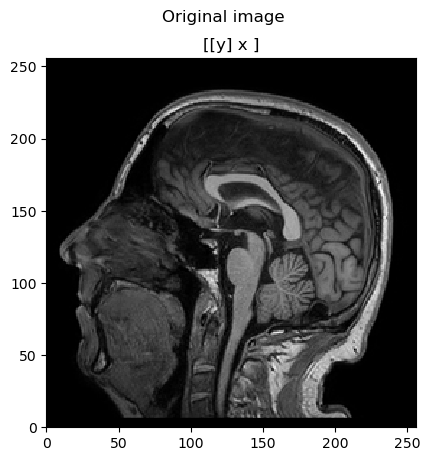

In [4]:
sigpy.plot.ImagePlot(sigpy.flip(t1[45],axes=(2,)),title='Original image')

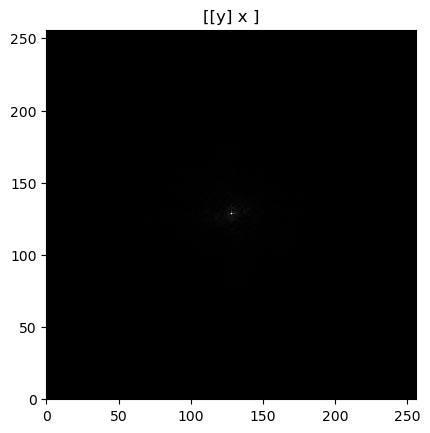

In [5]:
im_fourier = sigpy.fft(t1[45])
sigpy.plot.ImagePlot(im_fourier)

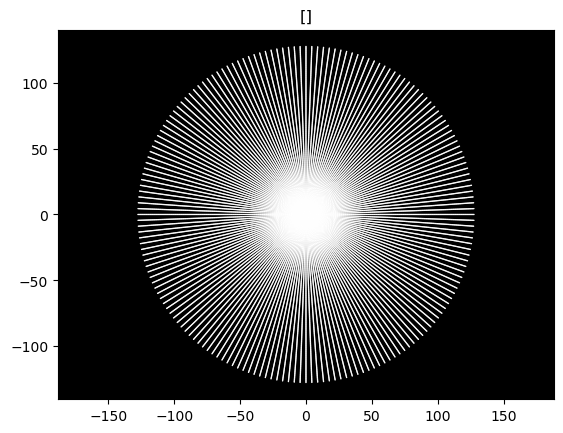

In [11]:
# Spokes
coord = sigpy.mri.radial([180,256,2],[256,256],golden=False)
sigpy.plot.ScatterPlot(coord)

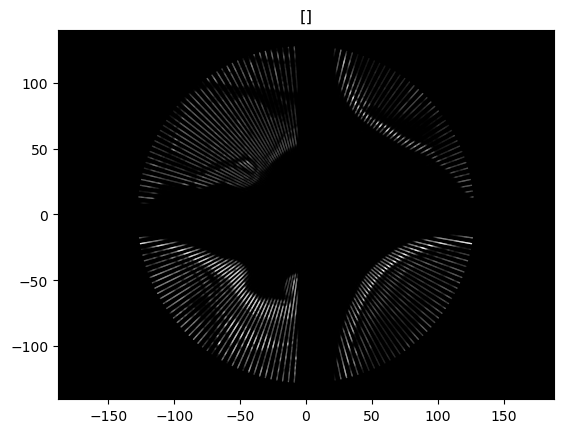

In [14]:
# Try sampling the original image without translating the spokes
sampled_im = sigpy.interpolate(t1[45], coord)
sigpy.plot.ScatterPlot(coord, sampled_im)

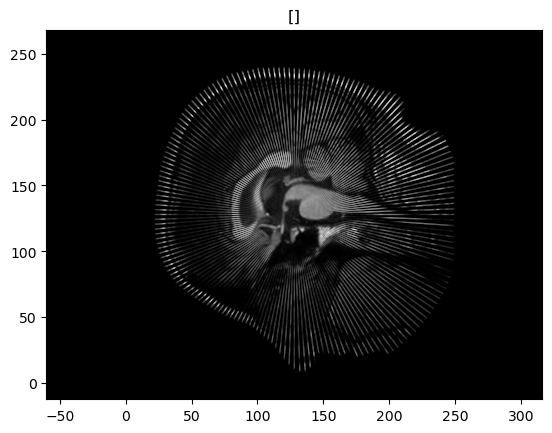

In [17]:
# Now translate spokes
def translate_spokes_to_img_coord(spokes, im_size=(256,256)):
    x_shift = np.floor(im_size[1]/2) # x_shift determines how columns will be shifted
    y_shift = np.floor(im_size[0]/2) # y_shift determines how rows will be shifted
    new_spokes = []
    for spoke in spokes:
        new_spoke = []
        for point in spoke:
            new_point = [point[0] + x_shift, abs(point[1] - y_shift)]
            new_spoke.append(new_point)
        new_spokes.append(new_spoke)
    return np.array(new_spokes)

coord_tr = translate_spokes_to_img_coord(coord)
sampled_im_tr=sigpy.interpolate(t1[45],coord_tr)
sigpy.plot.ScatterPlot(coord_tr, sampled_im_tr)
